In [2]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")
#
#print("Path to dataset files:", path)

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("C:\\GitRepos\\lab-eda-univariate\\data\\asaniczka\\uk-optimal-product-price-prediction\\versions\\3\\amz_uk_price_prediction_dataset.csv")
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
cat_freq = df.category.value_counts()
cat_freq.sort_values(ascending=False, inplace=True)
cat_freq = cat_freq.head(5)

print(cat_freq)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


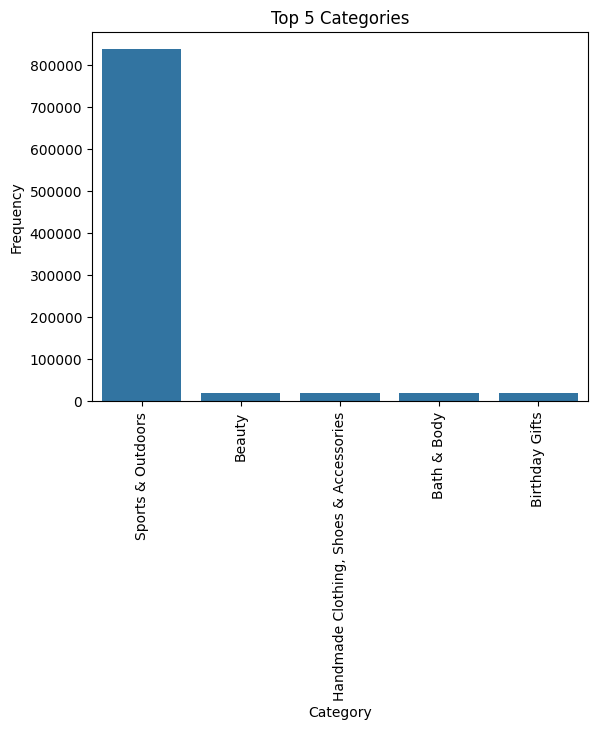

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=cat_freq.index, y=cat_freq.values)
plt.title("Top 5 Categories")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

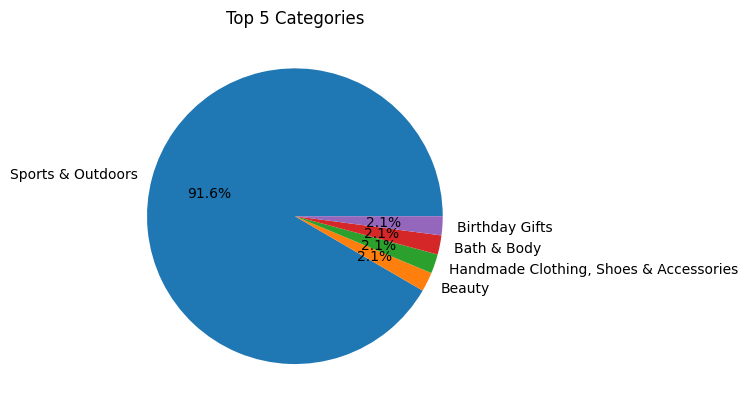

In [7]:
plt.pie(cat_freq.values, labels=cat_freq.index, autopct='%1.1f%%')
plt.title("Top 5 Categories")
plt.show()

# Pricing

In [8]:
#get mean and mode of price
p_mean = df.price.mean()
p_mode = df.price.mode()
p_median = df.price.median()

print(f"mean: {p_mean}, mode: {p_mode}, median: {p_median}")

# OUTPUT:
# mean(avg): 89.24380943923663, mode: 9.99, median: 19.09
 

mean: 89.24380943923663, mode: 0    9.99
Name: price, dtype: float64, median: 19.09


Given that the average is 89.24 and the median and mode are 19.09 and 9.99 respectively, there is a significant gap. We can assume that although most items are below 20, there might be a big deviation on the higher end of the scale - that is, a small set of very expensive items that are skewing the average

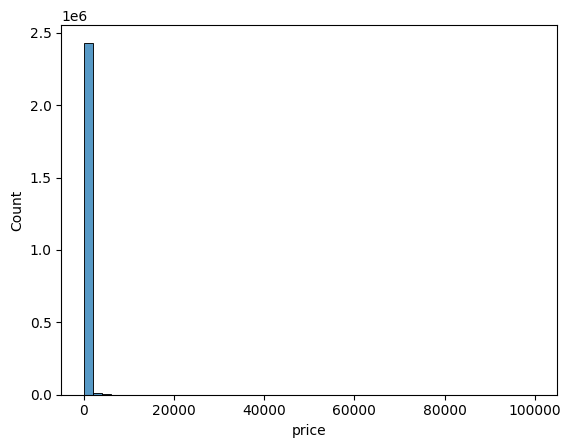

In [9]:
sns.histplot(df.price, bins = 50)
plt.show()

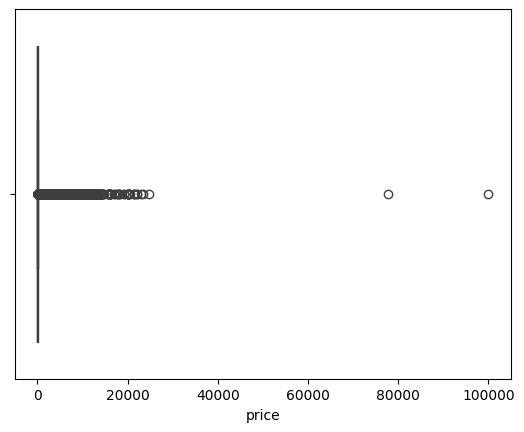

In [12]:
sns.boxplot(df.price, orient="h")
plt.show()

We can clearly see that most items are very cheap, while 2 major outliers living at the value of almost 100000 are completely skewing the results and visualizations. Let's remove them to better view the data:

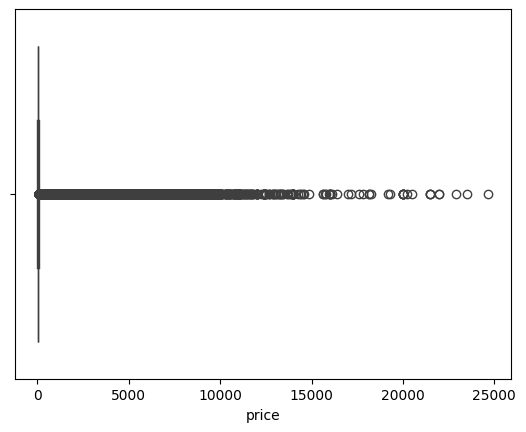

In [19]:
df_low = df[df.price < 50000].copy()
sns.boxplot(df_low.price, orient="h")
plt.show()

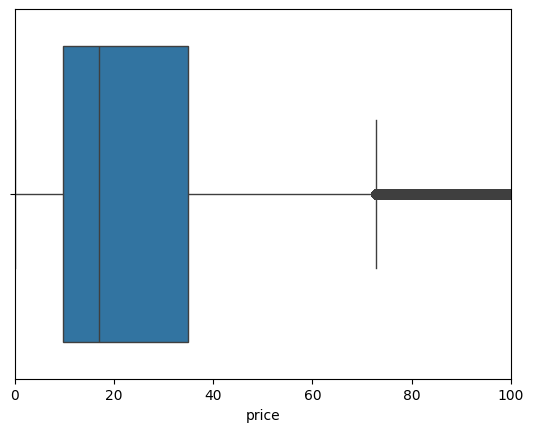

In [24]:
sns.boxplot(df_low.price, orient="h")
plt.xlim(0, 100)
plt.show()

# Ratings

mean: 2.152836472966065, mode: 0    0.0
Name: stars, dtype: float64, median: 0.0


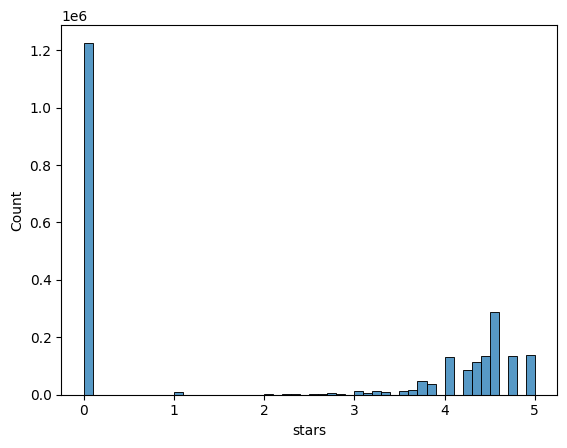

In [27]:
rating_mean = df.stars.mean()
rating_mode = df.stars.mode()
rating_median = df.stars.median()

print(f"mean: {rating_mean}, mode: {rating_mode}, median: {rating_median}")

sns.histplot(df.stars, bins = 50)
plt.show()

values with 0 stars really just mean that there is not a review for the item. This means, for a better analysis, might be best to remove this:

mean: 4.31916076222691, mode: 0    4.5
Name: stars, dtype: float64, median: 4.4


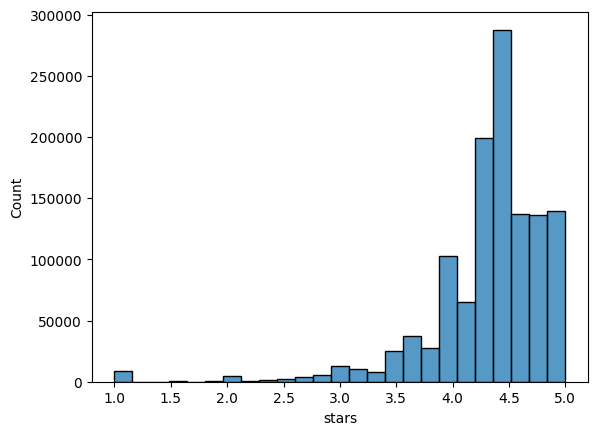

In [29]:
df_rating = df[df.stars > 0].copy()

rating_mean = df_rating.stars.mean()
rating_mode = df_rating.stars.mode()
rating_median = df_rating.stars.median()

print(f"mean: {rating_mean}, mode: {rating_mode}, median: {rating_median}")

sns.histplot(df_rating.stars, bins = 25)
plt.show()

Removing values with 0 stars, we see that people trend to rate a product at around 4.5 stars (supported by the mean, median and mode being 4.3, 4.4 and 4.5)

In [31]:
std = df_rating.stars.std()

print(f"standard deviation: {std}")

var = df_rating.stars.var()

print(f"variance: {var}")

IQR = df_rating.stars.quantile(0.75) - df_rating.stars.quantile(0.25)

print(f"IQR: {IQR}")

skew = df_rating.stars.skew()

print(f"skewness: {skew}")

kurt = df_rating.stars.kurt()

print(f"kurtosis: {kurt}")

standard deviation: 0.5552867504620729
variance: 0.30834337523872835
IQR: 0.5
skewness: -2.3795681122127945
kurtosis: 9.78193769066435


I believe the std deviation, variance and IQR represent a quite concentrated value range.
The skewness of -2.379 indicates a distribution tail that extends more to the left (negatively skewed)
A high kurtosis (>3) implies many outliers and a distribution with heavy tails.